In [1]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22



#outdir = 'outdir'
#label = 'eccentric'
#bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.
#np.random.seed(150914)

In [22]:
mass_1 = 1.46
mass_2 = 1.27
chirp_mass = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
mass_ratio = mass_2/mass_1
ff = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
tot_m = chirp_mass*(1+mass_ratio)**(6/5)/mass_ratio**(3/5)
print(chirp_mass,mass_ratio)
print(ff)
print(tot_m)

1.1848446629484104 0.8698630136986302
1610.2619182926735
2.7300000000000004


In [3]:
time_of_event = 1126259642.413
post_trigger_duration = 1.0
duration = 4.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 512.

In [14]:
injection_parameters = dict(
    mass_1=36.0, mass_2=29.9, eccentricity=0.0, luminosity_distance=600.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)


#minimum_frequency = 13.0
#maximum_frequency = 112.0

############# my waveform model ################
waveform_arguments = dict(waveform_approximant='OSMFD',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_advancement_of_pariastron,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

02:02 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_advancement_of_pariastron
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
02:02 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:02 bilby INFO    : Injected signal in H1:
02:02 bilby INFO    :   optimal SNR = 30.01
02:02 bilby INFO    :   matched filter SNR = 29.25+1.07j
02:02 bilby INFO    :   mass_1 = 36.0
02:02 bilby INFO    :   mass_2 = 29.9
02:02 bilby INFO    :   eccentricity = 0.0
02:02 bilby INFO    :   luminosity_distance = 600.0
02:02 bilby INFO    :   theta_jn = 0.4
02:02 bilby INFO    :   psi = 2.659
02:02 bilby INFO    :   phase = 1.3
02:02 bilby INFO    :   geocent_time = 1126259642.413
02:02 bilby INFO    :   ra = 1.375
02:02 bilby INFO    :   dec = -1.2108
02:02 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:02 bilby INF

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [15]:
############# TaylorF2Eccn waveform model ################
injection_parameters2 = dict(
    mass_1=36., mass_2=29., eccentricity=0.0, luminosity_distance=600., a_1=0.0, a_2=0.0, theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments2 = dict(waveform_approximant='TaylorF2Ecc',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator2 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2Ecc_fd,
    parameters=injection_parameters2, waveform_arguments=waveform_arguments2)

ifos2 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos2.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)

02:02 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2Ecc_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
02:02 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:02 bilby INFO    : Injected signal in H1:
02:02 bilby INFO    :   optimal SNR = 42.42
02:02 bilby INFO    :   matched filter SNR = 40.81-1.84j
02:02 bilby INFO    :   mass_1 = 36.0
02:02 bilby INFO    :   mass_2 = 29.0
02:02 bilby INFO    :   eccentricity = 0.0
02:02 bilby INFO    :   luminosity_distance = 600.0
02:02 bilby INFO    :   a_1 = 0.0
02:02 bilby INFO    :   a_2 = 0.0
02:02 bilby INFO    :   theta_jn = 0.4
02:02 bilby INFO    :   psi = 2.659
02:02 bilby INFO    :   phase = 1.3
02:02 bilby INFO    :   geocent_time = 1126259642.413
02:02 bilby INFO    :   ra = 1.375
02:02 bilby INFO    :   dec = -1.2108
02:02 bilby INFO    : Generation of spin parameter

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.79936856e-24-1.10750263e-24j, -2.81692486e-24-1.05228445e-24j,
         -2.83339063e-24-9.96832419e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.10376890e-24+2.78993103e-24j, -1.04873688e-24+2.80742815e-24j,
         -9.93471791e-25+2.82383840e-24j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.79936856e-24-1.10750263e-24j, -2.81692486e-24-1.05228445e-24j,
         -2.83339063e-24-9.96832419e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.10376890e-24+2.78993103e-24j, -1.04873688e-24+2.80742815e-24j,
         -9.93471791e-25+2.82383840e-24j])}]

In [16]:
############# TaylorF2 waveform model ################
injection_parameters3 = dict(
    mass_1=36., mass_2=29., a_1=0.0, a_2=0.0, luminosity_distance=600., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments3 = dict(waveform_approximant='TaylorF2',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator3 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2_fd,
    parameters=injection_parameters3, waveform_arguments=waveform_arguments3)

ifos3 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos3.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters3)

02:02 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
02:02 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:02 bilby INFO    : Injected signal in H1:
02:02 bilby INFO    :   optimal SNR = 42.42
02:02 bilby INFO    :   matched filter SNR = 44.13+1.25j
02:02 bilby INFO    :   mass_1 = 36.0
02:02 bilby INFO    :   mass_2 = 29.0
02:02 bilby INFO    :   a_1 = 0.0
02:02 bilby INFO    :   a_2 = 0.0
02:02 bilby INFO    :   luminosity_distance = 600.0
02:02 bilby INFO    :   theta_jn = 0.4
02:02 bilby INFO    :   psi = 2.659
02:02 bilby INFO    :   phase = 1.3
02:02 bilby INFO    :   geocent_time = 1126259642.413
02:02 bilby INFO    :   ra = 1.375
02:02 bilby INFO    :   dec = -1.2108
02:02 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:02 bilby IN

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.79936856e-24-1.10750263e-24j, -2.81692486e-24-1.05228445e-24j,
         -2.83339063e-24-9.96832419e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.10376890e-24+2.78993103e-24j, -1.04873688e-24+2.80742815e-24j,
         -9.93471791e-25+2.82383840e-24j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.79936856e-24-1.10750263e-24j, -2.81692486e-24-1.05228445e-24j,
         -2.83339063e-24-9.96832419e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.10376890e-24+2.78993103e-24j, -1.04873688e-24+2.80742815e-24j,
         -9.93471791e-25+2.82383840e-24j])}]

In [20]:
#to plot the frequency domain  
############# my waveform model ################
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]
idxs = H1.strain_data.frequency_mask  

############# TaylorF2Eccn waveform model ################
injection2 = ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)
H12 = ifos2[0]
H1_injection2 = injection2[0]
idxs2 = H12.strain_data.frequency_mask

############# TaylorF2 waveform model ################
injection3 = ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters2)
H13 = ifos3[0]
H1_injection3 = injection3[0]
idxs3 = H13.strain_data.frequency_mask

############# my waveform model ################
fig, ax = plt.subplots()

'''ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")'''
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization, Mine")

############# TaylorF2Eccn waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="EccentricFD")

############# TaylorF2 waveform model ################
'''ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2")'''

#############################
ax.set_xlim(20.,512.)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

02:06 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:06 bilby INFO    : Injected signal in H1:
02:06 bilby INFO    :   optimal SNR = 30.01
02:06 bilby INFO    :   matched filter SNR = 149.30+1.07j
02:06 bilby INFO    :   mass_1 = 36.0
02:06 bilby INFO    :   mass_2 = 29.9
02:06 bilby INFO    :   eccentricity = 0.0
02:06 bilby INFO    :   luminosity_distance = 600.0
02:06 bilby INFO    :   theta_jn = 0.4
02:06 bilby INFO    :   psi = 2.659
02:06 bilby INFO    :   phase = 1.3
02:06 bilby INFO    :   geocent_time = 1126259642.413
02:06 bilby INFO    :   ra = 1.375
02:06 bilby INFO    :   dec = -1.2108
02:06 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:06 bilby INFO    : Injected signal in L1:
02:06 bilby INFO    :   optimal SNR = 24.30
02:06 bilby INFO    :   matched filter SNR = 122.87+0.01j
02:06 bilby INFO    :   mass_1 = 36.0
02:06 bilby INFO    :   mass_2 = 29.9
02:06 bilby INFO    :   eccentricity = 0.0
02:06 bilby IN

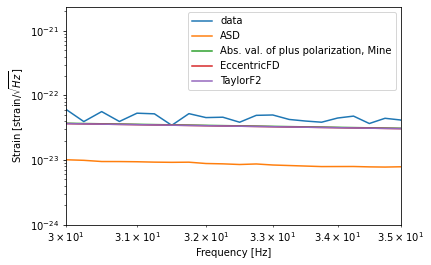

In [11]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization, Mine")

############# TaylorF2Eccn waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="EccentricFD")

############# TaylorF2 waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2")

#############################
ax.set_xlim(30.,35.)
ax.set_ylim(1e-24,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()